Notebook aims to determine the statistical distribution of backtested returns. This will be used to calibrate Monte Carlo risk engine 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import backtested returns from main script

backtested_strategy_returns_df = pd.read_csv('Backtested_strategy_returns.csv', index_col=0)
individual_security_returns_df = pd.read_csv('Individual_security_returns.csv', index_col=0)
backtested_strategy_returns_array = np.array(backtested_strategy_returns_df['Backtested strategy'])

individual_security_returns_df.columns

Index(['S&P 500 return', 'iShares Global Tech ETF return',
       'iShares Global Healthcare ETF return', 'FTSE 100 return',
       'ESTX 50 PR.EUR return', 'Nikkei 225 return',
       'iShares MSCI Emerging Markets ETF return',
       'U.S. Treasury Bond Futures return',
       'ASI Asia Pacific ex-Japan Tracker Fund return', 'Alphabet Inc. return',
       'Facebook Inc. return', 'Microsoft Corporation return',
       'Snap Inc. return', 'Spotify Technology S.A. return',
       'Netflix, Inc. return', 'Apple Inc. return', 'Datadog, Inc return',
       'Lyxor Core FTSE Actuaries UK Gilts 0-5Y return'],
      dtype='object')

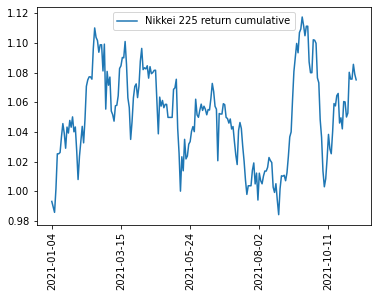

In [8]:
# Plot cumulative return of individual holdings
security_name = 'Nikkei 225 return'
subset_security_returns_df = pd.DataFrame(individual_security_returns_df.loc['2021-01-01' :, security_name])
subset_security_returns_df[security_name + ' cumulative'] = np.cumprod(1+subset_security_returns_df[security_name])
subset_security_returns_df.plot(kind = 'line', y = security_name + ' cumulative')
plt.xticks(rotation=90)
plt.show()

C:\Users\danhi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


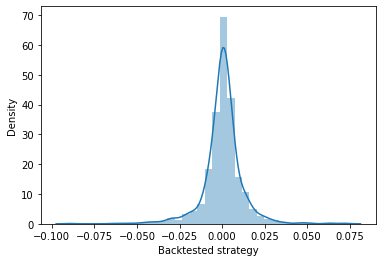

In [4]:
sns.distplot(backtested_strategy_returns_df['Backtested strategy'], bins=int(np.sqrt(backtested_strategy_returns_df.shape[0])))
plt.show()

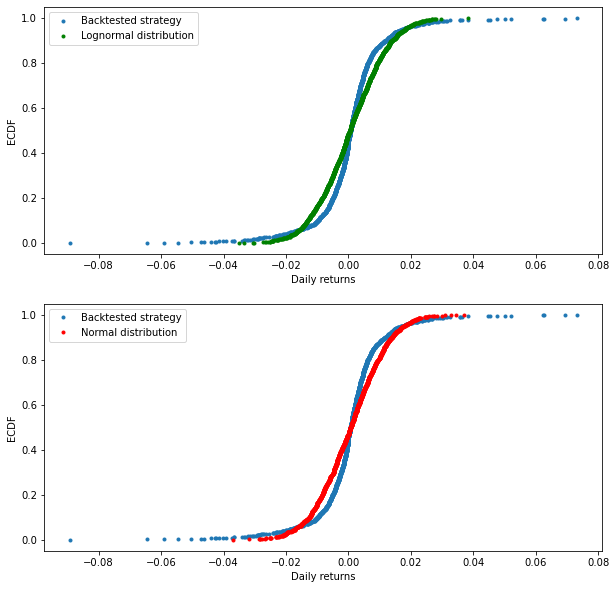

In [5]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, 1 + n) / n

    return x, y


normal_distribution = np.random.normal(backtested_strategy_returns_array.mean(), backtested_strategy_returns_array.std()-0.001, len(backtested_strategy_returns_array))
lognormal_distribution = np.random.lognormal(backtested_strategy_returns_array.mean(), backtested_strategy_returns_array.std()-0.001, len(backtested_strategy_returns_array))



x_strategy, y_strategy = ecdf(backtested_strategy_returns_array)
x_normal, y_normal = ecdf(normal_distribution)
x_lognormal, y_lognormal = ecdf(np.log(lognormal_distribution))


# Generate ECDF plot
_ = plt.figure(figsize=(10, 10))
_ = plt.subplot(211)
_ = plt.plot(x_strategy, y_strategy, marker ='.', linestyle ='none', label = 'Backtested strategy')
_ = plt.plot(x_lognormal, y_lognormal, marker = '.', linestyle = 'none', color = 'green', label = 'Lognormal distribution')

#Label the axes
_ = plt.xlabel('Daily returns')
_ = plt.ylabel('ECDF')
_ = plt.legend()

#Model outliers
_ = plt.subplot(212)
_ = plt.plot(x_strategy, y_strategy, marker ='.', linestyle ='none', label = 'Backtested strategy')
_ = plt.plot(x_normal, y_normal, marker = '.', linestyle = 'none', color = 'red', label = 'Normal distribution')
_ = plt.xlabel('Daily returns')
_ = plt.ylabel('ECDF')
_ = plt.legend()

# Display the plot
plt.show()


In [6]:
#Determine outliers defined as +/- 3 SD

backtested_strategy_returns_array_outliers = backtested_strategy_returns_array[np.logical_or(backtested_strategy_returns_array< backtested_strategy_returns_array.mean()-3*backtested_strategy_returns_array.std(), backtested_strategy_returns_array< backtested_strategy_returns_array.mean()+3*backtested_strategy_returns_array.std())]
backtested_strategy_returns_array_outliers = np.sort(backtested_strategy_returns_array_outliers)

print(backtested_strategy_returns_array_outliers)


[-0.08931023 -0.06457864 -0.05907894 ...  0.03113595  0.03155248
  0.03258176]
